In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

    # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
    # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/migraine-symptom-dataset-for-classification/migraine_symptom_classification.csv


In [14]:
df = pd.read_csv('/kaggle/input/migraine-symptom-dataset-for-classification/migraine_symptom_classification.csv')
#Downloading df=DataFrame

In [15]:
df.info()
#First checking our data, we can see, that all data is clear(withoun Nan's)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [16]:
#Checking the distribution of target variable



df['Type'], uniques = pd.factorize(df['Type'])
print(uniques)


#Coding of Target variable ot unique sequence

Index(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'],
      dtype='object')


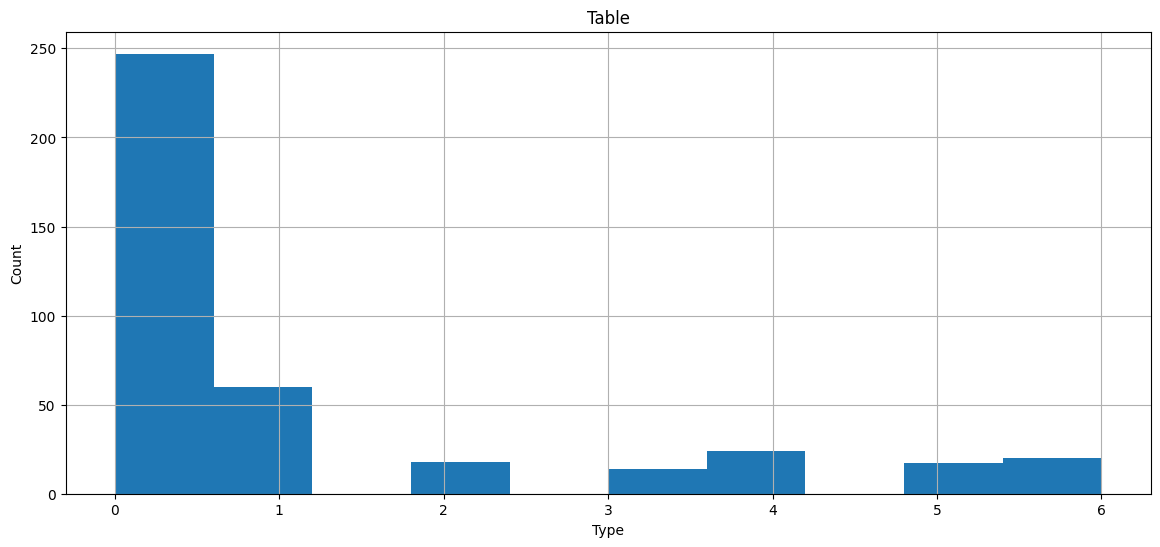

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,6))
plt.hist(df['Type'])
plt.title('Table')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [23]:
print(uniques[0]) #As we can see a lot of people have: Typical aura with migraine

Typical aura with migraine


Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64


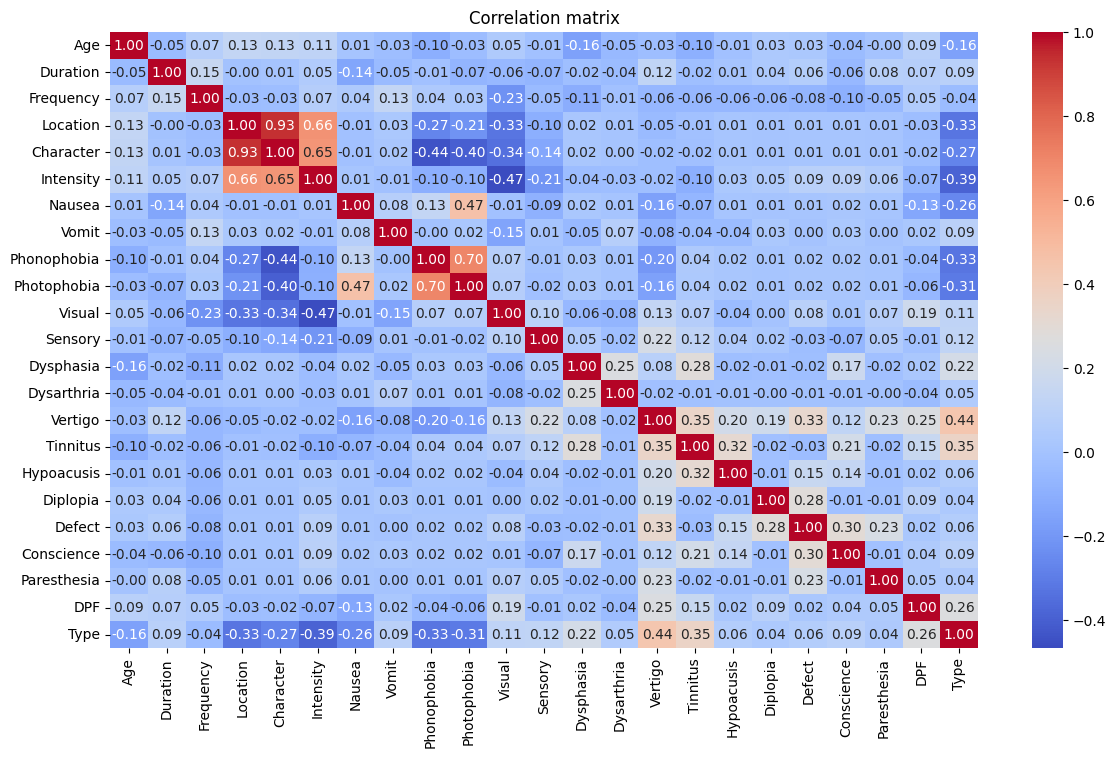

In [35]:
import seaborn as sns
print(df.isnull().sum())
import warnings
warnings.filterwarnings('ignore')
df.fillna(df.mean(), inplace=True)
corr = df.corr(numeric_only=True)

plt.figure(figsize = (14,8))
sns.heatmap(corr , annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation matrix")
plt.show()

In [26]:
print(df.describe()) #Basic Statistics

              Age    Duration   Frequency    Location   Character  Intensity  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    31.705000    1.610000    2.365000    0.972500    0.977500    2.47000   
std     12.139043    0.770964    1.675947    0.268186    0.277825    0.76849   
min     15.000000    1.000000    1.000000    0.000000    0.000000    0.00000   
25%     22.000000    1.000000    1.000000    1.000000    1.000000    2.00000   
50%     28.000000    1.000000    2.000000    1.000000    1.000000    3.00000   
75%     40.000000    2.000000    4.000000    1.000000    1.000000    3.00000   
max     77.000000    3.000000    8.000000    2.000000    2.000000    3.00000   

           Nausea       Vomit  Phonophobia  Photophobia  ...     Vertigo  \
count  400.000000  400.000000   400.000000   400.000000  ...  400.000000   
mean     0.987500    0.322500     0.977500     0.980000  ...    0.125000   
std      0.111242    0.468019     0.148489     0.14

In [34]:
df.drop(columns = 'Ataxia', inplace = True)

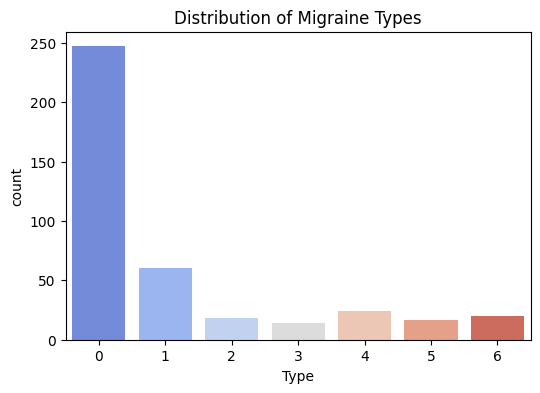

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Type", data=df, palette="coolwarm")
plt.title("Distribution of Migraine Types")
plt.show()

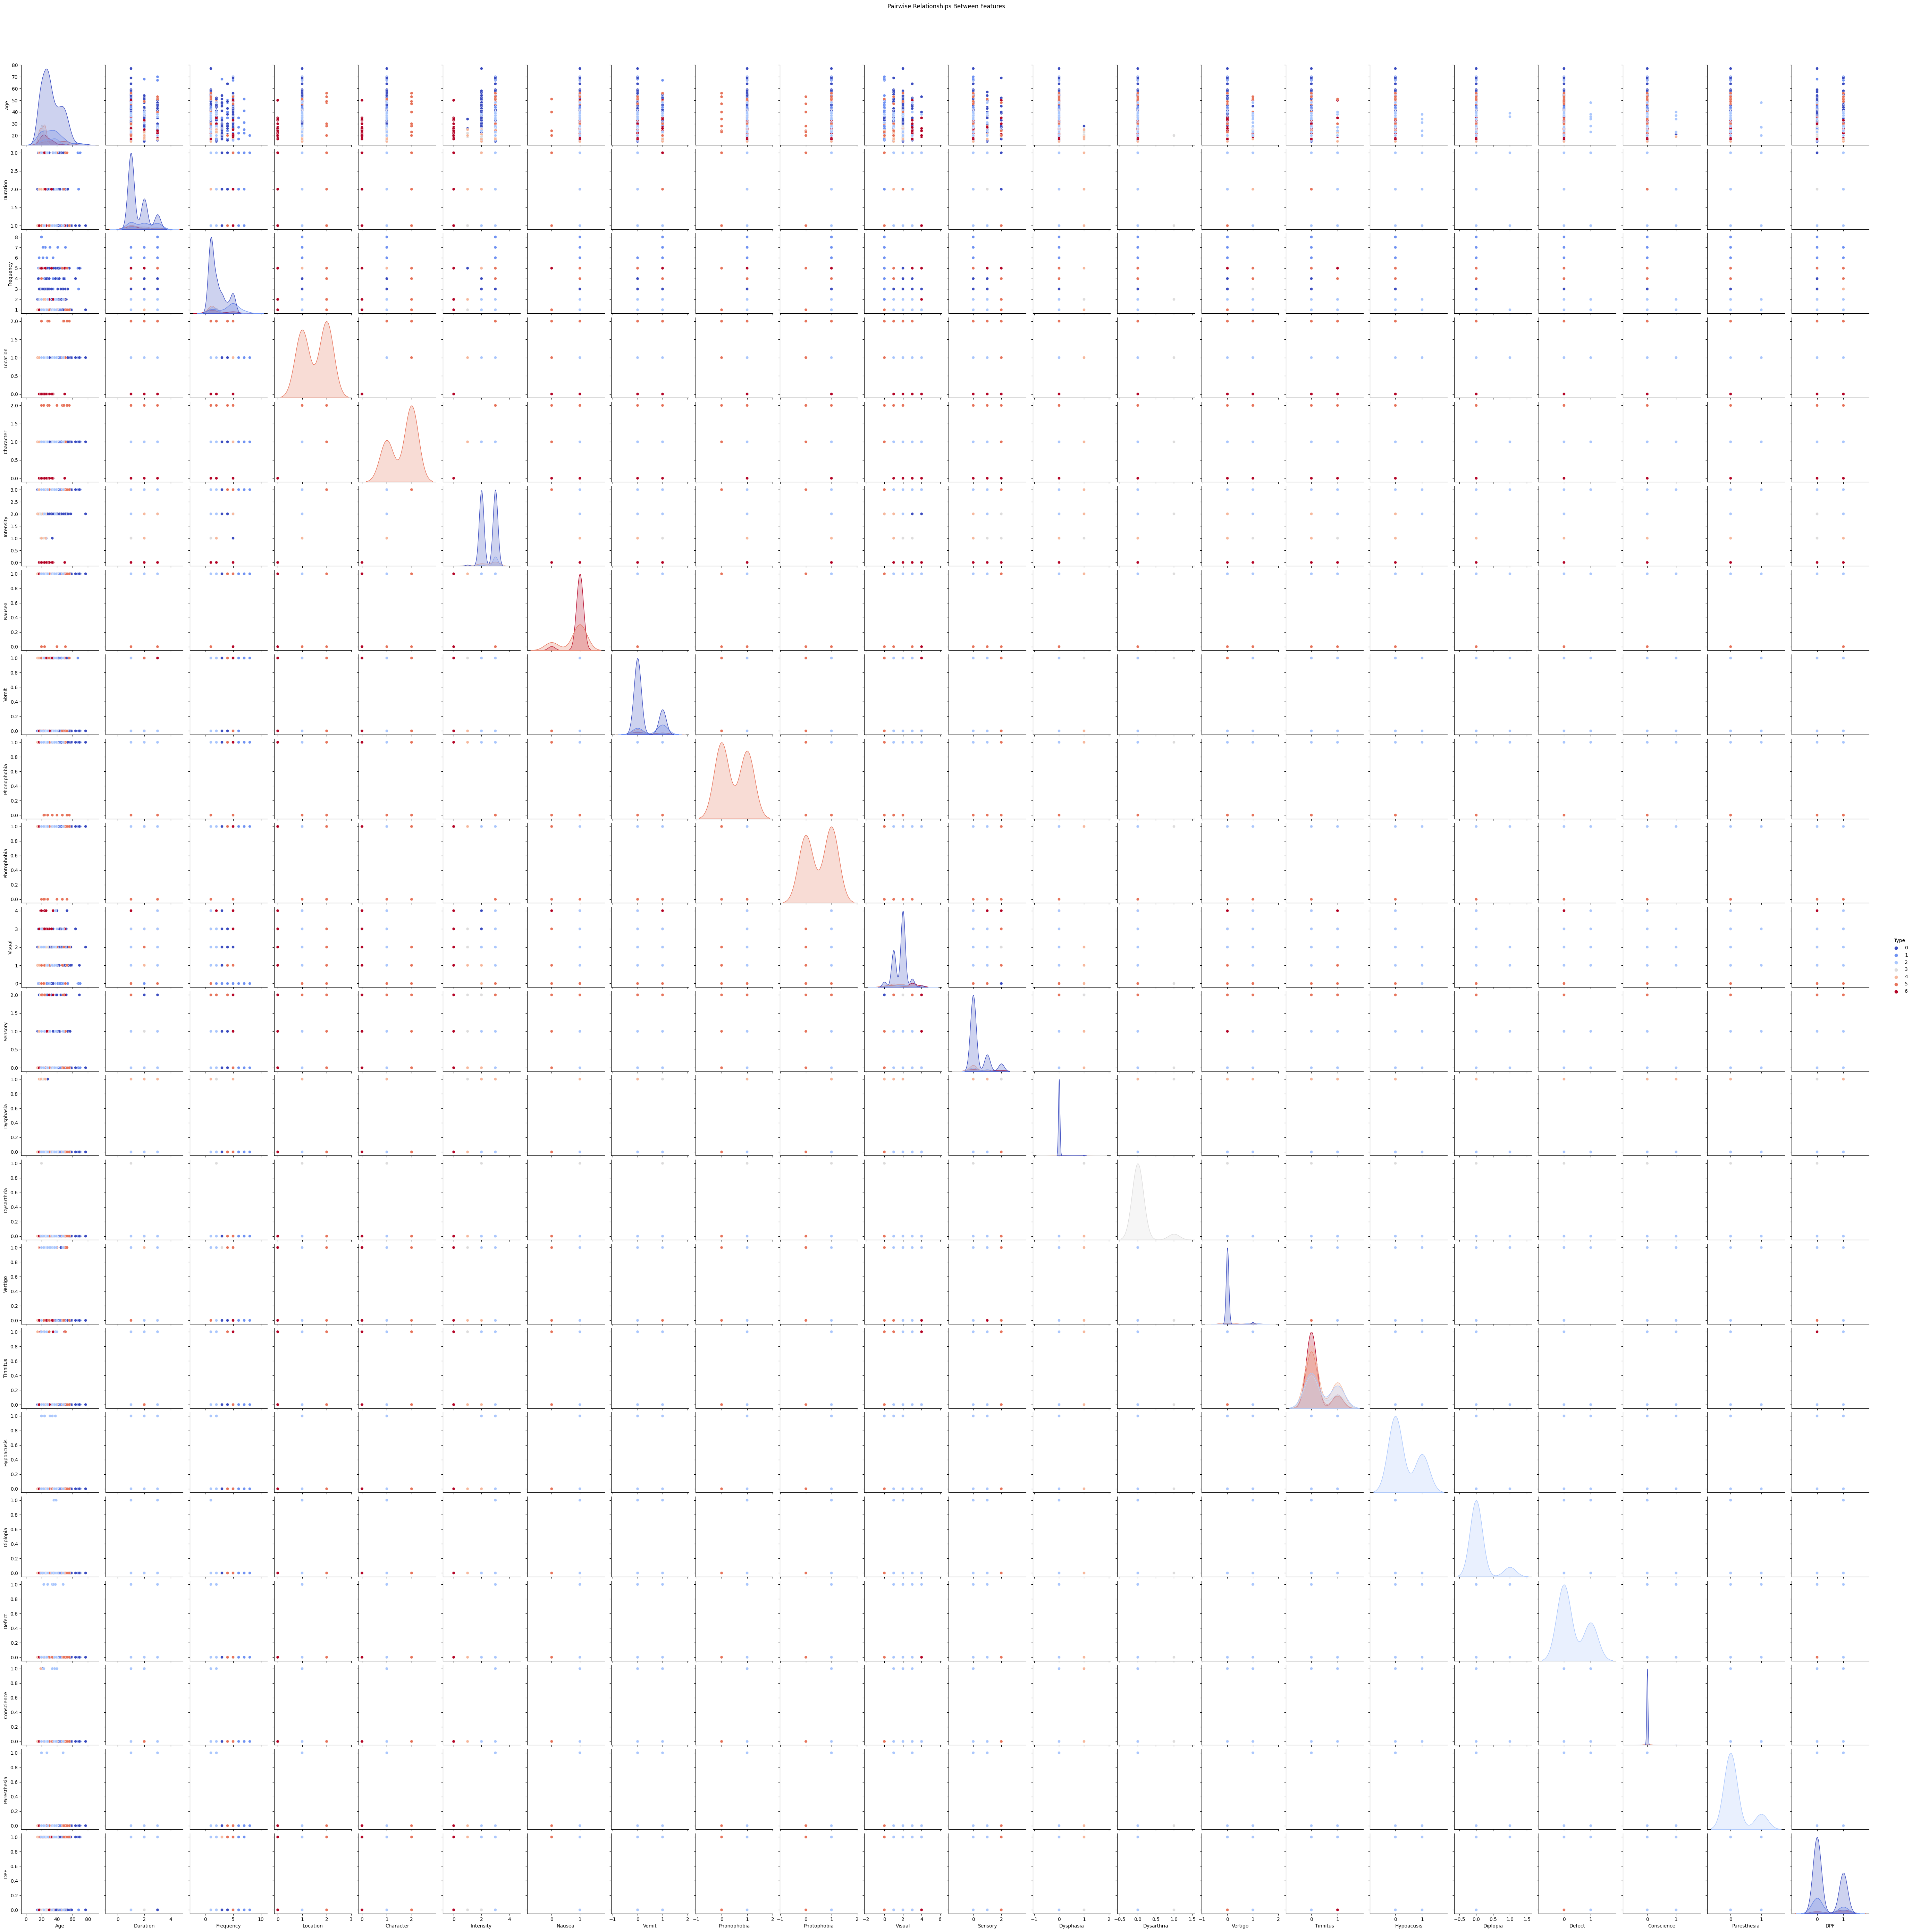

In [43]:
sns.pairplot(df, hue="Type", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

In [ ]:
df = pd.read_csv("/kaggle/input/migraine-symptom-dataset-for-classification/migraine_symptom_classification.csv") #One more downloading to learning

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize



#Encoding target variable.
le = LabelEncoder()
df["Type"] = le.fit_transform(df["Type"])


#Seperating Data
X = df.drop(columns = ["Type"])
y = df["Type"]


X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
Scaler = StandardScaler()


X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

models = {
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel = 'linear', probability = True)
}



for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_proba,multi_class='ovr')
    roc_pr_score = average_precision_score(y_test_bin,y_proba, average='macro')
    
    print(f"\n{name} Accuracy: {accuracy:.2f}")
    print(f"\n{name} ROC-AUC: {roc_auc:.2f}")
    print(f"\n{name} ROC-PR: {roc_pr_score:.2f}")
    print(classification_report(y_test, y_pred))






Random Forest Accuracy: 0.95

Random Forest ROC-AUC: 0.99

Random Forest ROC-PR: 0.87
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       0.87      1.00      0.93        13
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3

    accuracy                           0.95        80
   macro avg       0.83      0.77      0.80        80
weighted avg       0.93      0.95      0.94        80


Gradient Boosting Accuracy: 0.93

Gradient Boosting ROC-AUC: 0.99

Gradient Boosting ROC-PR: 0.88
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6
